## Import Libraries

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load data

In [157]:
# Read the file dataset processed_data.csv
data = pd.read_csv('./dataset/archive/processed_data.csv')

data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Bachelor,Single,58.138,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,Bachelor,Single,46.344,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,Bachelor,Together,71.613,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,Bachelor,Together,26.646,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58.293,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Bachelor,Married,61.223,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2232,PhD,Together,64.014,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2233,Bachelor,Divorced,56.981,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2234,Master,Together,69.245,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


In [158]:
data_copy = data.copy()

## Split data

In [159]:
X = data_copy[['Kidhome','Teenhome', 'MntFishProducts',
               'MntMeatProducts', 'MntFruits','MntSweetProducts', 'MntWines',
               'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases', 
               'NumStorePurchases', 'NumWebPurchases','NumWebVisitsMonth', 
               'Recency']]
y = data_copy['Income']

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Train and test

In [161]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.89219497e+00  6.57099276e+00  4.09815456e-03  2.02910438e-02
  1.32306904e-02  3.19258739e-02  1.75761141e-02 -9.48465610e-03
 -5.33516883e-01  7.89441028e-01  3.04097796e-01  9.95642855e-01
 -3.10412773e+00 -1.81209474e-02]
Intercept: 48.9117321425509


In [162]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Đánh giá
print("Training set R^2:", r2_score(y_train, y_train_pred))
print("Test set R^2:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))

Training set R^2: 0.735831566455091
Test set R^2: 0.8060104649382478
Mean Squared Error (MSE): 82.28904521949335


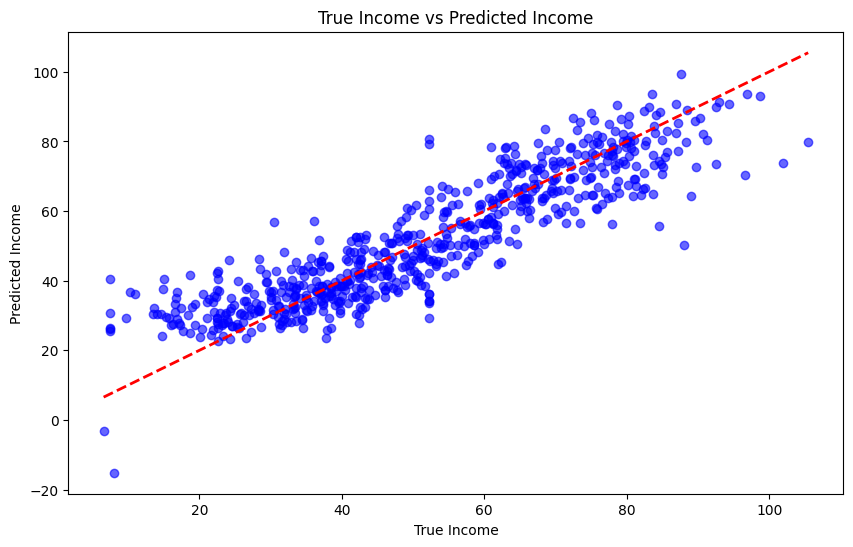

In [163]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel("True Income")
plt.ylabel("Predicted Income")
plt.title("True Income vs Predicted Income")
plt.show()
